In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from ipywidgets import interact, fixed
import warnings

warnings.simplefilter('ignore')
# フォントおよびフォントサイズ
rcParams['font.family'] = 'Meiryo'
rcParams['font.size'] = 16.0


# カラーサイクルの設定
plt.rcParams['axes.prop_cycle'] = (
    plt.cycler('color', 
            # 上から優先順位が高い順になっています
               [
                '#1167A7', # 青色：メインカラー1
                '#F6A90E', # 黄色：メインカラー2
                '#ABB7B9', # 灰色：サブカラー1
                '#4DA9ED', # 薄い青色
                '#FBDD9F', # 薄い黄色
                '#CDD4D5', # 薄い灰色
                '#0D4D7D', # 濃い青色
                '#BC8007', # 濃い黄色
                '#7A8D91', # 濃い灰色
               ])
)
# 上記12色で対応できない場合は以下のマーカーで差別化してください 
# 優先度：'o'（〇）＞','（■）＞'v'（▲）＞'^'（▼）＞

# #C4240E, # 赤色：アクセントカラー1
# #1C1C1C', # 黒色：アクセントカラー2



%matplotlib inline

# **z検定**

<br>

## **正規分布の性質おさらい**
【実験】
- 平均=50, 標準偏差=30 の正規分布から n_sample 個だけサンプリングして平均値を計算する
- 上記の操作を300回行った結果をヒストグラムとして描写する


【確認事項】
- サンプリングした値の平均値の分布は、元のガウス分布と比べて分散が 1/√サンプル数 を掛けただけ小さくなっている事を確かめる。

In [2]:
def gauss_n_sample(n_sample):
    """標本平均の分布を作成し、描画する関数

    Args:
        n_sample (int): サンプル数
    """
    MU = 50 # 元のガウス分布のμ
    SIGMA = 30 # 元のがガウス分布の母分散

    avg = []


    # n_samle個のサンプルの平均値を30000回計算
    # 平均値の平均値 = 平均値, 平均値の分散 = 分散/√(n_samle)
    for i in range(3000):
        samples = np.random.normal(MU, SIGMA, n_sample)
        avg += [sum(samples)/n_sample]


    step = SIGMA/50.
    x = np.arange(500)*step + MU - SIGMA*5
    g = stats.norm.pdf(x,MU,SIGMA) # 元のガウス分布
    g_avg = stats.norm.pdf(x,MU,SIGMA/np.sqrt(n_sample)) # 平均値の分布、　平均値もガウス分布することに注意

    fig, ax = plt.subplots()
    ax.plot(x,g,label="元のガウス分布");
    ax.plot(x,g_avg, label="理論から計算した平均値の分布");

    ax.hist(avg, density=True, bins=500, range=(-100,200 ),label="シミュレーションの結果");
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1));
    ax.set_ylim(0,0.1)

In [3]:
interact(gauss_n_sample, n_sample=(1,50,1)) # ここを変更する (start, end, step)

interactive(children=(IntSlider(value=25, description='n_sample', max=50, min=1), Output()), _dom_classes=('wi…

<function __main__.gauss_n_sample(n_sample)>

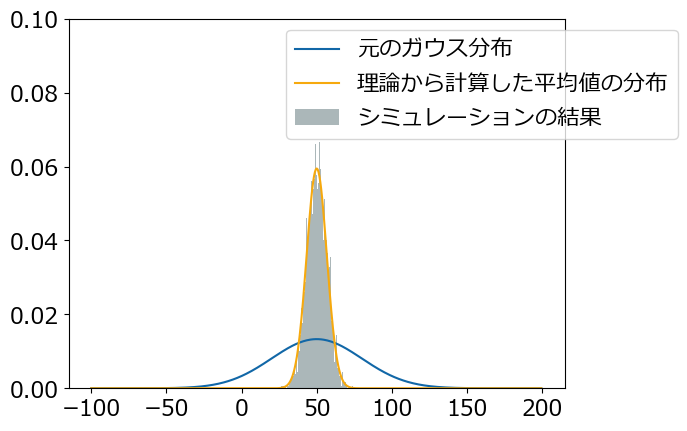

In [4]:
##-- 変更する変数 --##
n_sample = 20
##------------------##
gauss_n_sample(n_sample)


<br>

# **z検定**
【確認事項】
- 観測値とp値の関係を確認する

In [5]:
def z_test(mu, sigma, obs):
    """z検定を行う関数

    Args:
        mu (float): 母集団の平均値
        sigma (float): 母集団の標準偏差
        obs (int): サンプル数
    """
    """両側検定
    H0: 平均値 mu,  標準偏差 sigma
    H1 : 平均値 != mu
    
    """
    step = sigma/100.

    x = np.arange(1000)*step + mu - sigma*5
    g = stats.norm.pdf(x,mu,sigma)

    fig, ax = plt.subplots()
    ax.plot(x, g, label="帰無仮説における分布");
    ax.vlines(obs,0,max(g), color="red", label="観測値")
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
    
    p = ( 1 - stats.norm.cdf(obs, loc=mu, scale=sigma) ) #両側検定
    ax.text(-9,0.10,f"p値 = {p:.2}", size=15)
    
    result = "帰無仮説を棄却" if p<=0.05 else "帰無仮説を採用"
    color = "red" if p<=0.05 else "blue"
    ax.text(-9,0.08,f"判定 = {result}", size=15, color=color)

In [6]:
interact(z_test, mu=fixed(5), sigma=fixed(3), obs=(5,20,0.1) ) # ここを変更する (start, end, step)

interactive(children=(FloatSlider(value=12.0, description='obs', max=20.0, min=5.0), Output()), _dom_classes=(…

<function __main__.z_test(mu, sigma, obs)>

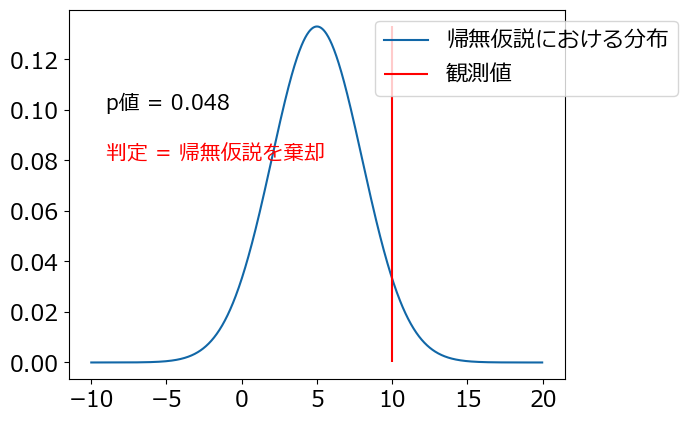

In [7]:
##-- 変更する変数 --##
obs = 10 #観測数
##------------------##

MU = 5
SIGMA = 3

z_test(MU,SIGMA,obs)

## **サンプリング数を増やす**
【確認事項】
- サンプリング数を増やすと分散が小さくなり、小さな効果も検証可能になることを確認する

In [8]:
def z_test_n_sample(n_sample):
    """サンプル数に応じて検定結果が変わる様子を描画する関数

    Args:
        n_sample (int): サンプル数
    """
    mu = 50 # 元のガウス分布のμ
    sigma = 30 # 元のがガウス分布の母分散
    obs=57

    x = np.arange(0,100,1)
    g = stats.norm.pdf(x,mu,sigma) # 元のガウス分布
    g_avg = stats.norm.pdf(x,mu,sigma/np.sqrt(n_sample)) # 平均値の分布、　平均値もガウス分布することに注意

    fig, ax = plt.subplots()
    p = ( 1 - stats.norm.cdf(obs, loc=mu, scale=sigma/np.sqrt(n_sample)) ) #両側検定
    ax.text(80,0.09,f"p値 = {p:.2}", size=15)
    
    result = "帰無仮説を棄却" if p<=0.05 else "帰無仮説を採用"
    color = "red" if p<=0.05 else "blue"
    ax.text(80,0.08,f"判定 = {result}", size=15, color=color)
    

    ax.plot(x,g,label="元のガウス分布");
    ax.plot(x,g_avg, label="理論から計算した平均値の分布")
    ax.vlines(obs,0,0.1, color="red", label="観測値")
    ax.set_ylim(0,0.1)

In [9]:
interact(z_test_n_sample, n_sample=(1,150,1)) # ここを変更する (start, end, step)

interactive(children=(IntSlider(value=75, description='n_sample', max=150, min=1), Output()), _dom_classes=('w…

<function __main__.z_test_n_sample(n_sample)>

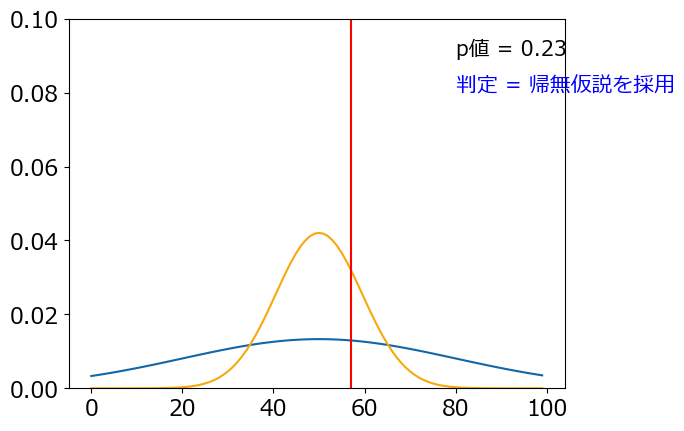

In [10]:
##-- 変更する変数 --##
n_sample = 10 #サンプリング数
##------------------#

z_test_n_sample(n_sample)


<br>

# **t検定**


## **t分布**
【実験】  
- ガウス分布に従う母集団から n個 の値をサンプリングする
- n 個の値から推定した標本分散をもとにそれぞれの値を標準化する
- 上記の行程を 3万回 行った結果をヒストグラムに表示する


【確認事項】  
- 標準正規分布よりも t 分布の方が分布を正しく表現出来ていることを確かめる。
- サンプリング数を増やしていくと標準正規分布に近づくことを確かめる。

In [11]:
def t_distribution(n_sample):
    """t分布を作成し、描画する関数

    Args:
        n_sample (int): サンプル数
    """
    MU = 55 # 元のガウス分布のμ
    SIGMA = 34 # 元のがガウス分布の母分散


    t = []


    # n_samle個のサンプルの平均値を30000回計算
    # 平均値の平均値 = 平均値, 平均値の分散 = 分散/√(n_samle)
    for i in range(30000):
        samples = np.random.normal(MU, SIGMA, n_sample)

        norm_avg = np.average(samples) - MU

        sample_variance = np.var(samples - MU, ddof=1) #不偏標本分散
        sample_sigma = np.sqrt(sample_variance)   
        sample_err = sample_sigma/np.sqrt(n_sample)

        t += [norm_avg/sample_err]


    x = np.arange(600)*0.01 - 3
    func_g = stats.norm.pdf(x,0,1) # 元のガウス分布
    func_t = stats.t.pdf(x,n_sample) # 自由度 n_sample のt分布

    fig, ax = plt.subplots()
    ax.plot(x,func_g,label="標準正規分布")
    ax.plot(x,func_t,label="t分布")

    ax.hist(t, density=True, bins=500, range=(-3,3),label="シミュレーションの結果")
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
    ax.text(-3.3,0.51,f"サンプリング数 = {n_sample}", size=15)
    ax.set_ylim(0,0.5)

In [12]:
interact(t_distribution, n_sample=(2,10,1)) # ここを変更する (start, end, step)

interactive(children=(IntSlider(value=6, description='n_sample', max=10, min=2), Output()), _dom_classes=('wid…

<function __main__.t_distribution(n_sample)>

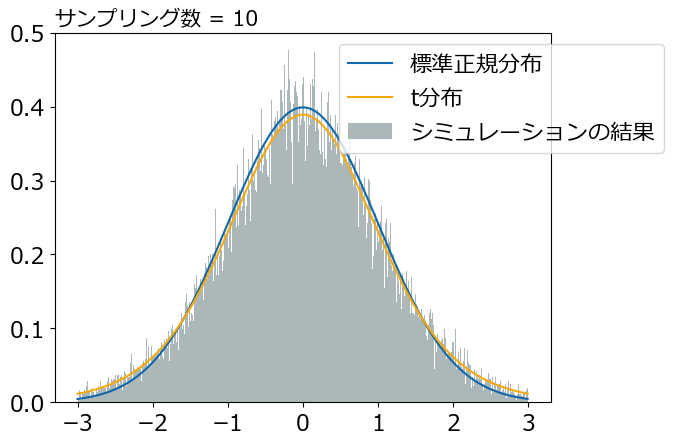

In [13]:
##-- 変更する変数 --##
n_sample = 10 #サンプリング数
##------------------#

t_distribution(n_sample)

## t検定

In [14]:
def t_test(mu, samples, dof):
    """t検定を行う関数

    Args:
        mu (float): 平均値
        samples (int): サンプル数
        dof (int): 自由度
    """
    
    """両側検定
    H0: 平均値 = mu
    H1 : 平均値 != mu
    """

    #標準化
    norm_avg = np.average(samples) - mu

    sample_variance = np.var(samples - mu, ddof=1) #不偏標本分散
    sample_sigma = np.sqrt(sample_variance)   
    sample_err = sample_sigma/np.sqrt(len(samples))

    t = norm_avg/sample_err

    # p-値計算
    p = 2*( 1 - stats.t.cdf(t, dof) ) #両側検定
    print(f"p値 = {p}")

    # 描画
    x = np.arange(1000)*0.01 -5
    g = stats.t.pdf(x,dof)

    fig, ax = plt.subplots()
    ax.plot(x, g, label="帰無仮説における分布")
    ax.vlines(t,0,max(g), color="red", label="観測値")
    ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1))

p値 = 0.017346883359626863


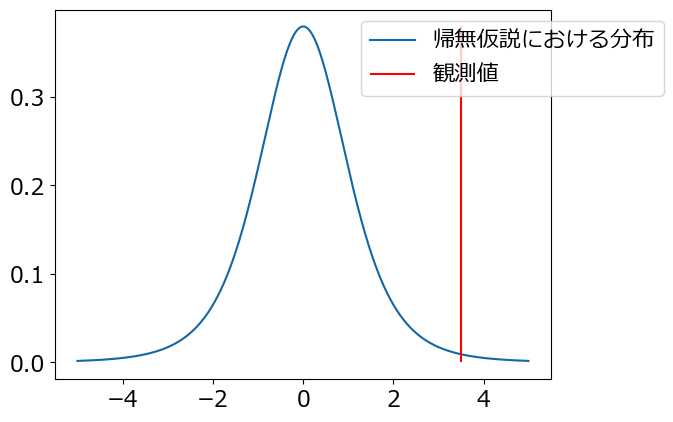

In [15]:
mu = 30
obs = np.array([33,32,36,31,36])
dof = len(obs)

t_test(mu, obs, dof) # ここを変更する (start, end, step)